In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d= pd.read_csv("User_activity.txt")

In [3]:
df=d.transpose()

In [4]:
df=df.drop_duplicates()

In [5]:
df_1=df.rename(columns=df.iloc[0])

In [6]:
df_1=df_1.iloc[1:,:]

Dataframe df_1 formed from text file

In [7]:
df_1

,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606
4,B-52-14212,Netflix (Mobile App),17.3502
...,...,...,...
22435,B-52-12331,Pinterest (Mobile App),88.5276
22436,B-52-33231,Facebook Messenger (Mobile App),199.3194
22437,B-52-46037,Outlook (Mobile App),52.5042
22438,B-52-16131,Google Search (Mobile App),1.89


In [8]:
demog=pd.read_csv("device_demographics.csv")

In [9]:
df1=pd.merge(df_1,demog,how='inner',on='device_id')

In [10]:
df1

,device_id,app_name,minutes,gender_id
0,B-52-23845,Snapchat (Mobile App),27.9342,2.0
1,B-52-23845,Pinterest (Mobile App),5.5188,2.0
2,B-52-23845,Instagram (Mobile App),867.132,2.0
3,B-52-23845,Tumblr (Mobile App),184.8042,2.0
4,B-52-23845,YouTube (Mobile App),69.6276,2.0
...,...,...,...,...
22435,B-52-1368,Google Play (Mobile App),31.9032,2.0
22436,B-52-10203,YouTube (Mobile App),4.2336,1.0
22437,B-52-10203,Netflix (Mobile App),7.8246,1.0
22438,B-52-10203,Kindle (Mobile App),1632.7332,1.0


In [11]:
publish=pd.read_csv("publishers.csv")

In [12]:
data=pd.merge(df1,publish,how='inner',on='app_name')

Final dataframe 'data' after merging three files

In [13]:
data

,device_id,app_name,minutes,gender_id,Publisher
0,B-52-23845,Snapchat (Mobile App),27.9342,2.0,"Snapchat, Inc"
1,B-52-36461,Snapchat (Mobile App),183.9348,2.0,"Snapchat, Inc"
2,B-52-29089,Snapchat (Mobile App),309.2418,2.0,"Snapchat, Inc"
3,B-52-30970,Snapchat (Mobile App),4.914,1.0,"Snapchat, Inc"
4,B-52-12407,Snapchat (Mobile App),306.5202,2.0,"Snapchat, Inc"
...,...,...,...,...,...
23402,B-52-26828,Sam's Club Scan & Go (Mobile App),1.0584,2.0,Wal-Mart
23403,B-52-50008,Sam's Club Scan & Go (Mobile App),24.759,2.0,Wal-Mart
23404,B-52-35568,Sam's Club Scan & Go (Mobile App),63.7686,1.0,Wal-Mart
23405,B-52-10336,Sam's Club Scan & Go (Mobile App),0.6048,1.0,Wal-Mart


In [14]:
data.drop_duplicates(inplace=True)

In [15]:

data.reset_index(inplace=True)

In [16]:
data.dtypes

index          int64
device_id     object
app_name      object
minutes       object
gender_id    float64
Publisher     object
dtype: object

converting minutes column into float

In [17]:
data['minutes'] = data['minutes'].astype(float)

In [18]:
data.dtypes

index          int64
device_id     object
app_name      object
minutes      float64
gender_id    float64
Publisher     object
dtype: object

In [19]:
data.describe()

,index,minutes,gender_id
count,22440.000000,21692.000000,21645.000000
mean,11468.094831,1061.745544,1.626657
std,6779.853047,2276.126489,0.483703
min,0.000000,0.037800,1.000000
25%,5609.750000,29.521800,1.000000
50%,11219.500000,164.335500,2.000000
75%,17576.250000,901.312650,2.000000
max,23406.000000,50897.435400,2.000000


In [20]:
data.isnull().sum()

index          0
device_id      0
app_name       0
minutes      748
gender_id    795
Publisher      0
dtype: int64

##EDA

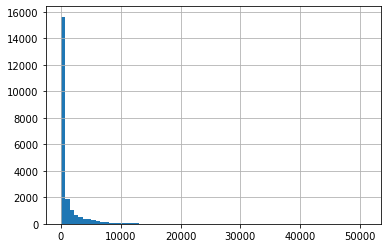

In [21]:
data['minutes'].hist(bins=70)

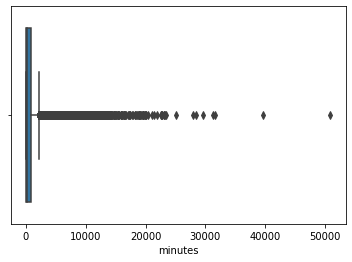

In [22]:
sns.boxplot(x='minutes',data=data)

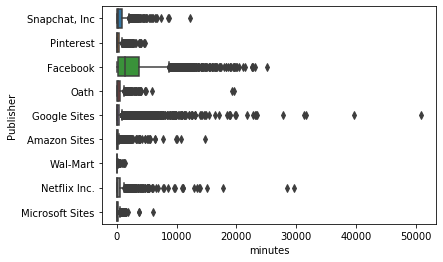

In [23]:
sns.boxplot(x='minutes',y='Publisher',data=data)

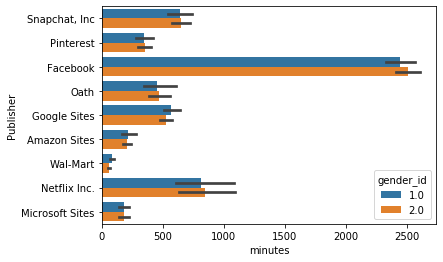

In [24]:

sns.barplot(y='Publisher',x='minutes',data=data,hue='gender_id')

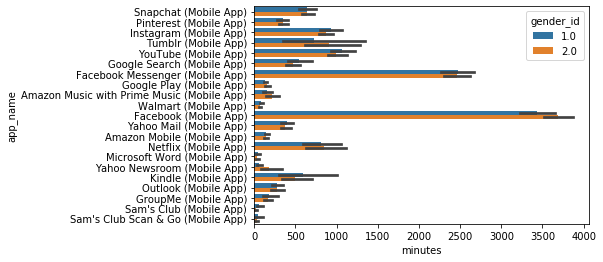

In [25]:
sns.barplot(y='app_name',x='minutes',data=data,hue='gender_id')

As mean of apps is drastically different from each other. So replacing null values with respective to their app_name

In [26]:
apps=list(data['app_name'].unique())

In [27]:
apps

['Snapchat (Mobile App)',
 'Pinterest (Mobile App)',
 'Instagram (Mobile App)',
 'Tumblr (Mobile App)',
 'YouTube (Mobile App)',
 'Google Search (Mobile App)',
 'Facebook Messenger (Mobile App)',
 'Google Play (Mobile App)',
 'Amazon Music with Prime Music (Mobile App)',
 'Walmart (Mobile App)',
 'Facebook (Mobile App)',
 'Yahoo Mail (Mobile App)',
 'Amazon Mobile (Mobile App)',
 'Netflix (Mobile App)',
 'Microsoft Word (Mobile App)',
 'Yahoo Newsroom (Mobile App)',
 'Kindle (Mobile App)',
 'Outlook (Mobile App)',
 'GroupMe (Mobile App)',
 "Sam's Club (Mobile App)",
 "Sam's Club Scan & Go (Mobile App)"]

In [28]:
mean_apps=pd.DataFrame(data.groupby('app_name').mean()['minutes'].sort_values(ascending=False))


In [29]:
mean_apps.iloc[:,0]['Facebook (Mobile App)']

3613.551220195168

In [30]:
data['minutes'].values[20]

nan

In [31]:
for i in list(data[data['minutes'].isnull()].index):
    app=data['app_name'].values[i]
    data['minutes'].values[i]=mean_apps.iloc[:,0][app]

In [32]:
data.isnull().sum()

index          0
device_id      0
app_name       0
minutes        0
gender_id    795
Publisher      0
dtype: int64

Replacing gender_id null values with mode of app_name

In [33]:
crosstab=pd.crosstab(index=data["app_name"],columns=data['gender_id'])

In [34]:
crosstab

gender_id,1.0,2.0
app_name,,
Amazon Mobile (Mobile App),602,965
Amazon Music with Prime Music (Mobile App),96,188
Facebook (Mobile App),897,1478
Facebook Messenger (Mobile App),910,1519
Google Play (Mobile App),1015,1650
Google Search (Mobile App),966,1578
GroupMe (Mobile App),56,106
Instagram (Mobile App),601,1021
Kindle (Mobile App),123,200


In [35]:
crosstab=pd.crosstab(index=data["Publisher"],columns=data['gender_id'])

In [36]:
crosstab

gender_id,1.0,2.0
Publisher,,
Amazon Sites,821,1353
Facebook,2408,4018
Google Sites,2929,4745
Microsoft Sites,239,464
Netflix Inc.,285,492
Oath,338,577
Pinterest,317,581
"Snapchat, Inc",467,800
Wal-Mart,277,534


From above results we can clearly state that dataset is inclined towards gender_id whose value is 2. We are using ffill

In [37]:
data['gender_id'].fillna(method='ffill',inplace=True)

In [38]:
data.isnull().sum()

index        0
device_id    0
app_name     0
minutes      0
gender_id    0
Publisher    0
dtype: int64

All null values is atken care.

# statistical data -app wise

In [39]:
stat=pd.DataFrame(data.groupby('app_name')['minutes'].describe())

In [40]:
stat

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
Amazon Mobile (Mobile App),1625.0,144.841619,310.827761,0.0378,11.15100,50.9544,147.533400,5009.7096
Amazon Music with Prime Music (Mobile App),295.0,187.148590,448.933418,0.0378,3.62880,36.9684,175.883400,3864.5208
Facebook (Mobile App),2455.0,3613.551220,3243.764578,0.0756,1095.68970,2969.0766,5196.139200,25093.9080
Facebook Messenger (Mobile App),2522.0,2478.538655,3032.244591,0.0378,420.19425,1453.9959,3265.683750,23060.7594
Google Play (Mobile App),2761.0,148.563952,548.597522,0.1512,24.83460,60.4800,148.563952,18907.4844
Google Search (Mobile App),2638.0,502.334796,1909.067756,0.0378,18.31410,132.9237,416.395350,50897.4354
GroupMe (Mobile App),170.0,169.576006,275.806266,0.2268,16.25400,67.0383,203.241150,1903.6080
Instagram (Mobile App),1682.0,891.348522,1475.579461,0.0756,48.72420,271.5741,1006.292700,11940.7554
Kindle (Mobile App),336.0,552.357383,1621.900463,0.0378,2.31525,26.3655,277.518150,14741.0928


In [41]:
stat.to_csv('stat.csv')

# Rankings of individual Apps based on total users

In [42]:
pd.DataFrame(data['app_name'].value_counts())

,app_name
Google Play (Mobile App),2761
Google Search (Mobile App),2638
YouTube (Mobile App),2558
Facebook Messenger (Mobile App),2522
Facebook (Mobile App),2455
Instagram (Mobile App),1682
Amazon Mobile (Mobile App),1625
Snapchat (Mobile App),1317
Pinterest (Mobile App),938
Netflix (Mobile App),807


In [43]:
res=pd.DataFrame(data['app_name'].value_counts())

In [44]:
res.reset_index(level=0, inplace=True)

Creating file for Rankings of individual Apps based on total users named "Result1"

In [45]:
f=open('Result1.txt','w')
f.write("Rankings of individual Apps based on total users\n\n")
f.close()

In [46]:
f=open('Result1.txt','a')
for i in list(res.index):
    appname=res.values[i][0]
    usercount=str(res.values[i][1])
    statement=str(i+1)+'. '+appname+'   '+usercount+'\n'
    f.write(statement)
f.close()

In [47]:
res.to_csv('result1.csv')

# Rankings of individual Apps based average minutes per user

In [48]:
pd.DataFrame(data.groupby('app_name').mean()['minutes'].sort_values(ascending=False))


,minutes
app_name,
Facebook (Mobile App),3613.551220
Facebook Messenger (Mobile App),2478.538655
YouTube (Mobile App),1014.367789
Instagram (Mobile App),891.348522
Tumblr (Mobile App),836.755599
Netflix (Mobile App),823.864267
Snapchat (Mobile App),645.375175
Kindle (Mobile App),552.357383
Google Search (Mobile App),502.334796


In [49]:
res=pd.DataFrame(data.groupby('app_name').mean()['minutes'].sort_values(ascending=False))

In [50]:
res.reset_index(level=0, inplace=True)

Creating file for Rankings of individual Apps based average minutes per user named "Result2"

In [51]:
f=open('Result2.txt','w')
f.write("Rankings of individual Apps based average minutes per user\n\n")
f.close()

In [52]:
f=open('Result2.txt','a')
for i in list(res.index):
    appname=res.values[i][0]
    meanmin=str(res.values[i][1])
    statement=str(i+1)+'. '+appname+'   '+meanmin+'\n'
    f.write(statement)
f.close()

In [53]:
res.to_csv('result2.csv')

# Rankings of the publishers as per total devices across applications

In [54]:
pd.DataFrame(data['Publisher'].value_counts())

,Publisher
Google Sites,7957
Facebook,6659
Amazon Sites,2256
"Snapchat, Inc",1317
Oath,940
Pinterest,938
Wal-Mart,843
Netflix Inc.,807
Microsoft Sites,723


As publisher consists of multiple times due to many apps under it. We need to count unique device devices so performed below operation.

In [55]:
data1=data[['device_id','Publisher']].drop_duplicates()

In [56]:
pd.DataFrame(data1['Publisher'].value_counts())

,Publisher
Google Sites,2771
Facebook,2665
Amazon Sites,1740
"Snapchat, Inc",1317
Pinterest,938
Oath,860
Netflix Inc.,807
Wal-Mart,780
Microsoft Sites,597


In [57]:
res=pd.DataFrame(data1['Publisher'].value_counts())

In [58]:
res.reset_index(level=0, inplace=True)

In [59]:
res.to_csv('result3.csv')

Creating text file for Rankings of the publishers as per total devices across applications named "Result3"

In [60]:
f=open('Result3.txt','w')
f.write("Rankings of the publishers as per total devices across applications\n\n")
f.close()

In [61]:
f=open('Result3.txt','a')
for i in list(res.index):
    Publisher=res.values[i][0]
    devicecount=str(res.values[i][1])
    statement=str(i+1)+'. '+Publisher+'   '+devicecount+'\n'
    f.write(statement)
f.close()